In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('mnist_train.csv')

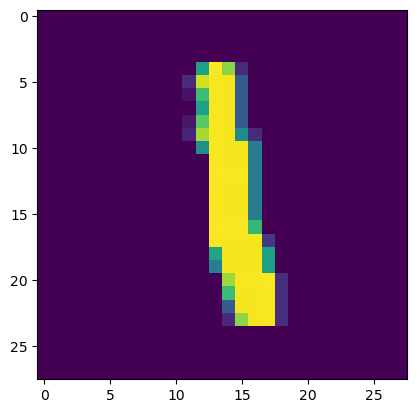

In [2]:
plt.imshow(df.iloc[6,1:].values.reshape(28,28))

In [3]:
df_test = pd.read_csv('mnist_test.csv')
X_test = df_test.iloc[:,1:]
Y_test = df_test.iloc[:,0]
df_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
image = df.iloc[:,1:]
label = df.iloc[:,0]
X_train = image
Y_train = label

In [5]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [6]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components = 30)

In [9]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers,models

2023-09-29 09:52:46.189333: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model = models.Sequential([
    layers.Dense(50,activation = 'relu'),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [12]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
#               metrics=['accuracy'])

In [13]:
# model.fit(X_train_trf,Y_train,batch_size=600,epochs = 10)

In [14]:
# model.summary()

In [15]:
# test_loss, test_accuracy = model.evaluate(X_test_trf, Y_test)
# print(f'Test accuracy: {test_accuracy}')

In [16]:
# from sklearn.metrics import accuracy_score
# predictions = model.predict(X_test_trf)
# predicted_classes = [np.argmax(prediction) for prediction in predictions]
# count = 0
# for i in range(10000):
#     if(predicted_classes[i]==Y_test[i]):
#         count+=1
# #     print(predicted_classes[i],Y_test[i])
# #     plt.imshow(df_test.iloc[5,1:].values.reshape(28,28))
# print(count/10000*100)

Epoch 1/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.2643 - accuracy: 0.9178
Epoch 2/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1529 - accuracy: 0.9518
Epoch 3/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.1269 - accuracy: 0.9597
Epoch 4/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1141 - accuracy: 0.9641
Epoch 5/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.1036 - accuracy: 0.9676
Epoch 6/10
6000/6000 [==============================] - 15s 3ms/step - loss: 0.0952 - accuracy: 0.9690
Epoch 7/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0878 - accuracy: 0.9714
Epoch 8/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0828 - accuracy: 0.9740
Epoch 9/10
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0783 - accuracy: 0.9745
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss

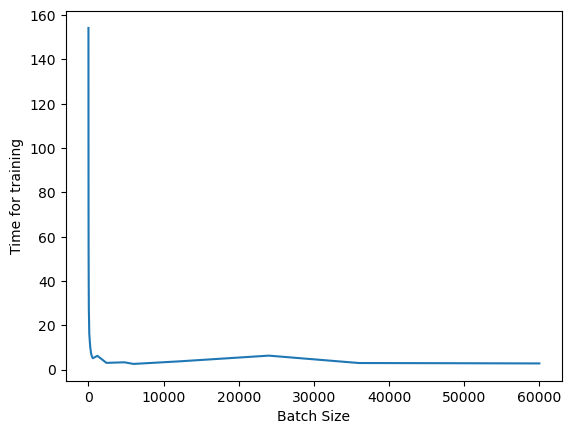

[0.96219999 0.96130002 0.96130002 0.96289998 0.96350002 0.96179998
 0.95990002 0.96060002 0.95740002 0.95039999 0.9411     0.91780001
 0.91219997 0.87819999 0.79089999 0.71200001 0.72460002 0.56900001]


In [22]:
batch_siz = np.array([10,20,30,60,120,240,360,480,600,1200,2400,4800,6000,12000,24000,36000,48000,60000])
times = np.array([])
accuracies = np.array([])
import time
for i in batch_siz:
    model = models.Sequential([
    layers.Dense(50,activation = 'relu'),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
    start = time.time()
    model.fit(X_train_trf,Y_train,batch_size = i,epochs = 10)
    times = np.append(times,time.time()-start)
    test_loss, test_accuracy = model.evaluate(X_test_trf, Y_test)
    accuracies = np.append(accuracies,test_accuracy)
plt.plot(batch_siz,times)
plt.xlabel('Batch Size')
plt.ylabel('Time for training')
plt.show()
print(accuracies)

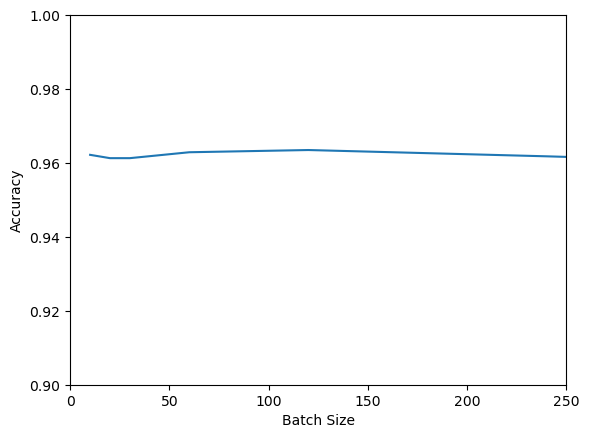

In [36]:
plt.plot(batch_siz,accuracies)
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
ymin = 0.9  # Replace with your desired minimum y-value
ymax = 1  # Replace with your desired maximum y-value
plt.ylim(ymin, ymax)
xmin = 0  # Replace with your desired minimum y-value
xmax = 250 # Replace with your desired maximum y-value
plt.xlim(xmin, xmax)
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.9319
Epoch 1/2
500/500 [==============================] - 2s 3ms/step - loss: 0.4157 - accuracy: 0.8720
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.1752 - accuracy: 0.9458
Epoch 1/3
500/500 [==============================] - 2s 3ms/step - loss: 0.4018 - accuracy: 0.8753
Epoch 2/3
500/500 [==============================] - 1s 3ms/step - loss: 0.1844 - accuracy: 0.9425
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1551 - accuracy: 0.9522
Epoch 1/4
500/500 [==============================] - 3s 3ms/step - loss: 0.4264 - accuracy: 0.8708
Epoch 2/4
500/500 [==============================] - 1s 3ms/step - loss: 0.1868 - accuracy: 0.9426
Epoch 3/4
500/500 [==============================] - 1s 3ms/step - loss: 0.1491 - accuracy: 0.9535
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9576
Epoch 1/5
500/500 [=

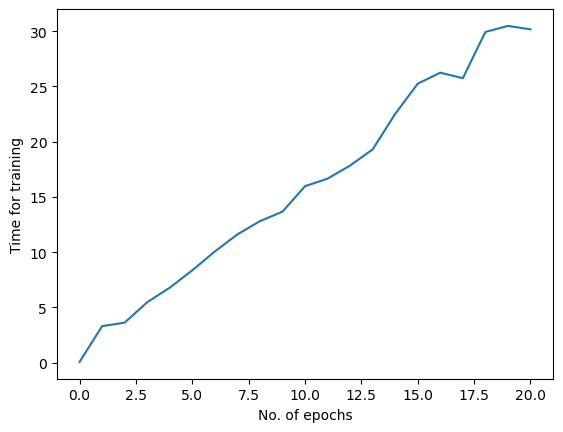

[0.13259999 0.93190002 0.94580001 0.9522     0.9576     0.95829999
 0.958      0.96179998 0.96200001 0.9623     0.96109998 0.95920002
 0.96160001 0.963      0.96399999 0.96429998 0.9673     0.96380001
 0.96649998 0.9637     0.96240002]


In [37]:
times = np.array([])
accuracies = np.array([])
import time
for i in range(21):
    model = models.Sequential([
    layers.Dense(50,activation = 'relu'),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
    start = time.time()
    model.fit(X_train_trf,Y_train,batch_size = 120,epochs = i)
    times = np.append(times,time.time()-start)
    test_loss, test_accuracy = model.evaluate(X_test_trf, Y_test)
    accuracies = np.append(accuracies,test_accuracy)
epoch = np.array(range(21))
plt.plot(epoch,times)
plt.xlabel('No. of epochs')
plt.ylabel('Time for training')
plt.show()
print(accuracies)

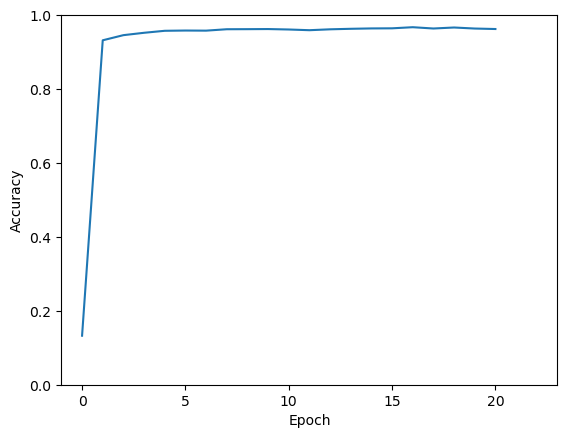

In [42]:
plt.plot(epoch,accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
ymin = 0  # Replace with your desired minimum y-value
ymax = 1  # Replace with your desired maximum y-value
plt.ylim(ymin, ymax)
xmin = -1  # Replace with your desired minimum y-value
xmax = 23 # Replace with your desired maximum y-value
plt.xlim(xmin, xmax)
plt.show()

## Thus 10 epochs and batch size of 120 gives maximum accuracy.

### Try finding how the accuracy of the model is varying with respect to the n_components chosen in PCA